# The upper ocean mixed layer

#### Load packages

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [316]:
data_dir='/home/wizard/Documents/observing_the_ocean/swart/exercises/Exercise1/'

In [322]:
import scipy.io as spio
dat=spio.loadmat(data_dir+'Swart_ex1_MIMOCdata.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Nov 18 22:56:24 2018',
 '__version__': '1.0',
 '__globals__': [],
 'temp': array([[ 0.09288381,  0.09288381,  0.09288381, ..., -0.19564779,
         -0.19576877, -0.19588976],
        [ 0.23925366,  0.23925366,  0.23925366, ..., -0.1956159 ,
         -0.19573591, -0.19585592],
        [-0.00672849, -0.00672849, -0.00672849, ..., -0.19653496,
         -0.19667077, -0.19680658],
        ...,
        [-1.71797097, -1.71797097, -1.71797097, ..., -0.17564286,
         -0.17586848, -0.1760941 ],
        [-1.4330138 , -1.4330138 , -1.4330138 , ..., -0.18415812,
         -0.18438647, -0.18461481],
        [-0.71027982, -0.71027982, -0.71027982, ..., -0.18666619,
         -0.18681686, -0.18696754]]),
 'depth': array([[   0,    1,    2, ..., 1948, 1949, 1950]])}

In [344]:
temp=dat['temp']
depth=dat['depth'].flatten()

In [345]:
def mld_calc(temp,depth):
    return depth[(abs((temp-temp[10]))>=0.2)].min()

In [346]:
#### compute mld using temperature threshold of 0.2C
mld = np.array([mld_calc(x,depth) for x in temp])
mld

array([ 43,  53,  66,  80,  94, 111, 106, 114, 114,  92, 122,  42])

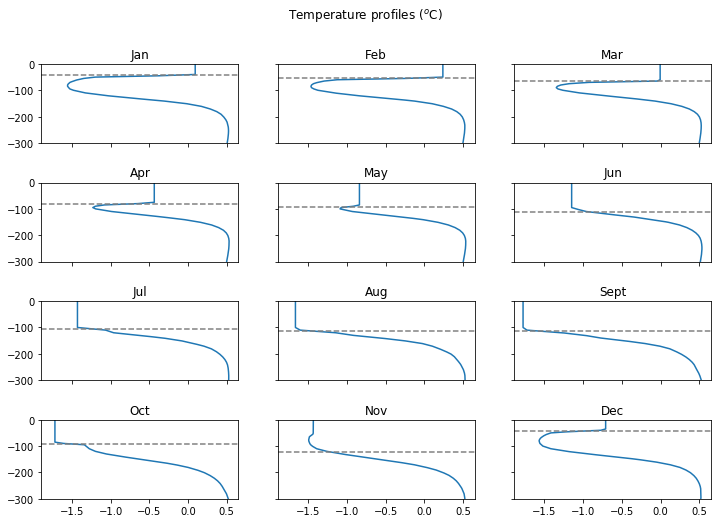

In [350]:
##### plot temperature profiles with MLD overlain
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
fig,ax=plt.subplots(4,3,figsize=[12,8],gridspec_kw=dict(hspace=0.5),sharex=True,sharey=True)
fig.suptitle('Temperature profiles ($^o$C)') 
targets=zip(ax.flatten(),np.arange(12),months)
for i, (axe,x,mon) in enumerate(targets):
    axe.plot(temp[i],depth*-1)
    axe.axhline(mld[i]*-1,linestyle='--',c='Grey')
    axe.set_ylim(-300,0)
    axe.set_title('{}'.format(months[i]))

In [303]:
# compute heat content
dens=1025
cp=4217
Heat=dens*cp*np.sum((temp+273.15),axis=1)

Text(0.5,0,'Months')

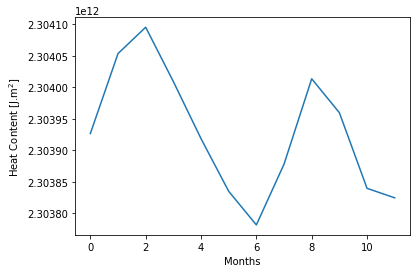

In [352]:
plt.plot(Heat)
plt.ylabel('Heat Content [J.m$^2$]')
plt.xlabel('Months')

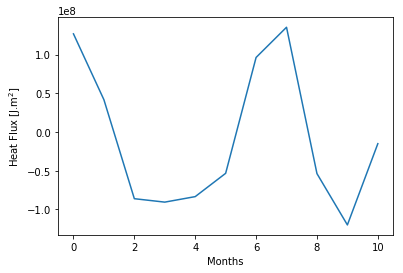

In [361]:
# delH=[]
delH=Heat[1:]-Heat[:-1]
plt.ylabel('Heat Flux [J.m$^2$]')
plt.xlabel('Months')



# H0=Heat[0]-Heat[11]
# delH.append(H1)
# Hflux.append(delH)
# Hflux.append(delHdecjan)
# Hflux=np.asarray(Hflux)
plt.plot(delH)

In [364]:
#temperature change
delta_T=np.asarray(delH)/(cp*dens*np.asarray(mld[1:]))

Text(0.5,0,'Months')

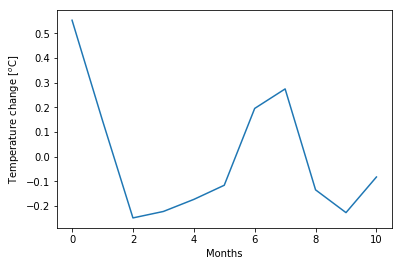

In [365]:
plt.plot(delta_T)
plt.ylabel('Temperature change [$^o$C]')
plt.xlabel('Months')

Text(0.5,0,'Months')

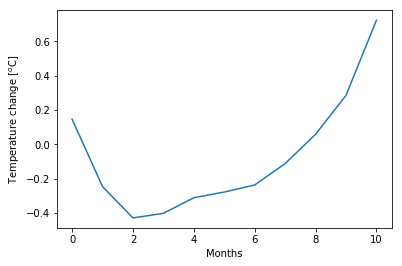

In [366]:
#temp of mixed layer
delta_T_actual=temp[1:,10]-temp[:-1,10]
plt.plot(delta_T_actual)
plt.ylabel('Temperature change [$^o$C]')
plt.xlabel('Months')

Text(0.5,0,'Months')

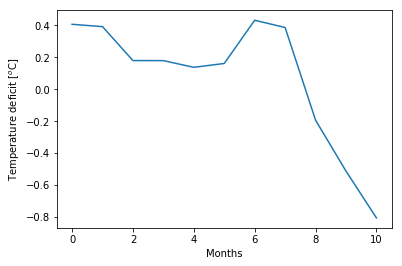

In [367]:
deficit=delta_T-delta_T_actual
plt.plot(deficit)
plt.ylabel('Temperature deficit [$^o$C]')
plt.xlabel('Months')

In [266]:
####deficit due to salinity
beta=0.7*10**-3
alpha=0.2*10**-3

deltaS=(alpha*deficit)/beta

Text(0.5,0,'Months')

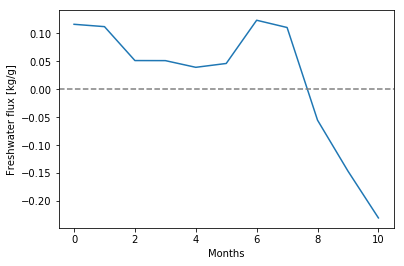

In [368]:
plt.plot(deltaS) #g/kg
plt.axhline(0,linestyle='--',c='Grey')
plt.ylabel('Freshwater flux [kg/g]')
plt.xlabel('Months')

In [274]:
#### Ch
week_time=24*7*3600
Q=200*week_time
delta_T=Q/(cp*dens*100)

In [275]:
delta_T

0.2798429122541166

In [276]:
delta_T=Q/(cp*dens*5)

In [277]:
delta_T

5.596858245082332